### 다항 회귀로 예측

In [378]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
dataset = pd.read_csv('LolTearData.csv')
X = dataset.iloc[:, :1].values
y = dataset.iloc[:, 3].values
X[:5], y[:5]

(array([[ 44],
        [120],
        [145],
        [188],
        [294]], dtype=int64),
 array([70, 53, 52, 48, 57], dtype=int64))

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5) # 5차 다항식
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # 5차 다항식에 맞게 5개로 변환

array([[1.00000000e+00, 4.40000000e+01, 1.93600000e+03, 8.51840000e+04,
        3.74809600e+06, 1.64916224e+08],
       [1.00000000e+00, 1.20000000e+02, 1.44000000e+04, 1.72800000e+06,
        2.07360000e+08, 2.48832000e+10],
       [1.00000000e+00, 1.45000000e+02, 2.10250000e+04, 3.04862500e+06,
        4.42050625e+08, 6.40973406e+10],
       [1.00000000e+00, 1.88000000e+02, 3.53440000e+04, 6.64467200e+06,
        1.24919834e+09, 2.34849287e+11],
       [1.00000000e+00, 2.94000000e+02, 8.64360000e+04, 2.54121840e+07,
        7.47118210e+09, 2.19652754e+12]])

In [60]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 5차 다항식으로 변환된 X값과 실제 y 값으로 모델 생성 [학습]

LinearRegression()

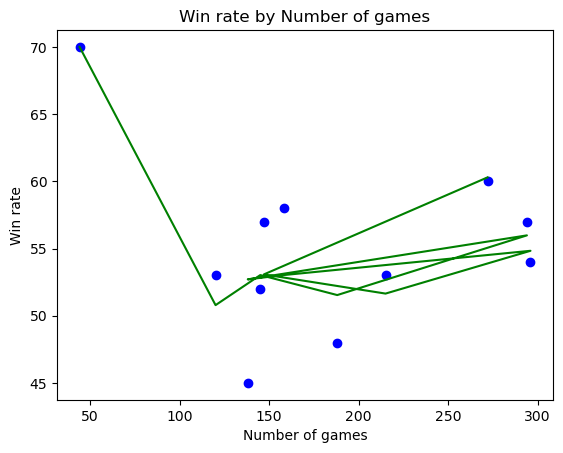

In [62]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X_poly), color='green')
plt.title('Win rate by Number of games')
plt.xlabel('Number of games')
plt.ylabel('Win rate')
plt.show()

### 데이터가 정렬되지 않아 그래프 모양이 깔끔하지 않은 것처럼 예상됨.

In [65]:
X = dataset.iloc[:, :1].values
y = dataset.iloc[:, 3].values

In [69]:
data = pd.DataFrame({'X': X.flatten(), 'y': y}) # X를 2D로 바꿔서 평탄화
data

,X,y
0,44,70
1,120,53
2,145,52
3,188,48
4,294,57
5,138,45
6,158,58
7,296,54
8,215,53
9,147,57


In [71]:
data_sorted = data.sort_values(by='X') # X를 기준으로 정렬
data_sorted

,X,y
0,44,70
1,120,53
5,138,45
2,145,52
9,147,57
6,158,58
3,188,48
8,215,53
10,272,60
4,294,57


In [234]:
X_sorted = data_sorted['X'].values.reshape(-1, 1) # 2D 형태였던 것을 2차원 배열로 변환
y_sorted = data_sorted['y'].values
X_sorted, y_sorted

(array([[ 44],
        [120],
        [138],
        [145],
        [147],
        [158],
        [188],
        [215],
        [272],
        [294],
        [296]], dtype=int64),
 array([70, 53, 45, 52, 57, 58, 48, 53, 60, 57, 54], dtype=int64))

In [236]:
poly_reg = PolynomialFeatures(degree=10) # 10차 다항식
X_poly_sorted = poly_reg.fit_transform(X_sorted)
lin_reg.fit(X_poly_sorted, y_sorted) # 10차 다항식으로 변환된 X값과 실제 y 값으로 모델 생성 [학습]

LinearRegression()

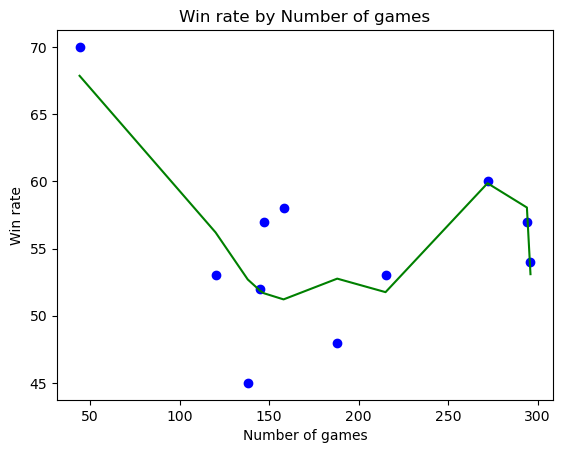

In [238]:
plt.scatter(X_sorted, y_sorted, color='blue')
plt.plot(X_sorted, lin_reg.predict(X_poly_sorted), color='green')
plt.title('Win rate by Number of games')
plt.xlabel('Number of games')
plt.ylabel('Win rate')
plt.show()

### 판수당 승률 예측

In [312]:
X_sorted_range = np.arange(min(X_sorted), max(X_sorted), 1)
X_sorted_range = X_sorted_range.reshape(-1, 1)
X_sorted_range.shape

min(X_sorted), max(X_sorted)

C:\Users\82102\AppData\Local\Temp\ipykernel_16676\3830843164.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_sorted_range = np.arange(min(X_sorted), max(X_sorted), 1)


(array([44], dtype=int64), array([296], dtype=int64))

In [344]:
poly_reg = PolynomialFeatures(degree=5)
X_poly_sorted = poly_reg.fit_transform(X_sorted)

lin_reg = LinearRegression()
lin_reg.fit(X_poly_sorted, y_sorted)

LinearRegression()

In [358]:
X_poly_sorted_range = poly_reg.fit_transform(X_sorted_range)
y_poly_sorted_range = lin_reg.predict(X_poly_sorted_range)
len(X_poly_sorted_range[-1])

6

In [396]:
X_predict = np.arange(max(X_sorted), max(X_sorted)+50 , 0.1).reshape(-1, 1)

C:\Users\82102\AppData\Local\Temp\ipykernel_16676\246372074.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_predict = np.arange(max(X_sorted), max(X_sorted)+50 , 0.1).reshape(-1, 1)


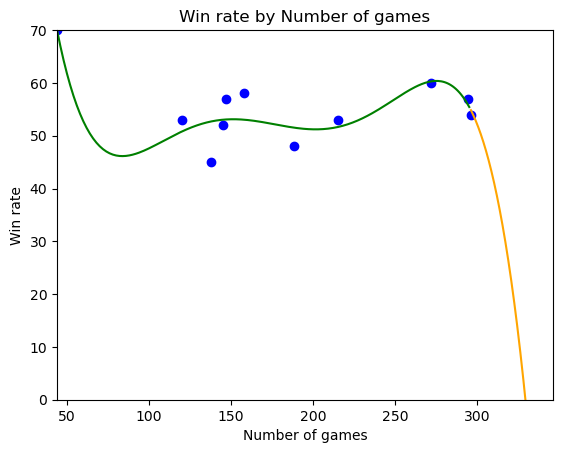

In [398]:
plt.scatter(X_sorted, y_sorted, color='blue')
plt.plot(X_sorted_range, y_poly_sorted_range, color='green')

plt.xlim(min(X_sorted_range), max(X_sorted)+50)
plt.ylim(0, max(y_sorted))

plt.plot(X_predict, lin_reg.predict(poly_reg.fit_transform(X_predict)), color='orange')

plt.title('Win rate by Number of games')
plt.xlabel('Number of games')
plt.ylabel('Win rate')
plt.show()